<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [ ]:
#Importation des librairies Pandas et numpy
import pandas as pd
import numpy as np

In [ ]:
#Importation de la librairie plotly express
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
#data_all2.columns

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [ ]:
#Importation du fichier web.xlsx
df_web = pd.read_csv('web.csv', sep=';')
#Importation du fichier erp.xlsx
df_erp = pd.read_csv('erp.csv', sep=';')
#importation du fichier liaison.xlsx
df_liaison = pd.read_csv('liaison.csv', sep=';')

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in df_erp.columns:
    print ("---- %s ---" % i)
    print(df_erp[i].value_counts())

---- product_id ---
3847    1
5610    1
5564    1
5565    1
5566    1
       ..
4635    1
4636    1
4646    1
4647    1
7338    1
Name: product_id, Length: 825, dtype: int64
---- onsale_web ---
1    716
0    109
Name: onsale_web, dtype: int64
---- price ---
45      15
31      13
19       9
40       8
13,5     8
        ..
18,1     1
14       1
30,1     1
34,5     1
8,4      1
Name: price, Length: 383, dtype: int64
---- stock_quantity ---
0      90
7      32
23     30
12     29
5      27
       ..
71      1
73      1
142     1
52      1
55      1
Name: stock_quantity, Length: 84, dtype: int64
---- stock_status ---
instock       733
outofstock     92
Name: stock_status, dtype: int64
---- purchase_price ---
10,31    4
5,01     4
12,4     4
24,18    4
4,81     4
        ..
27,88    1
28,16    1
6,03     1
32,01    1
13,42    1
Name: purchase_price, Length: 660, dtype: int64


In [ ]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,"24,2",16,instock,"12,88"
1,3849,1,"34,3",10,instock,"17,54"
2,3850,1,"20,8",0,outofstock,"10,64"
3,4032,1,"14,1",26,instock,"6,92"
4,4039,1,46,3,outofstock,"23,77"


In [ ]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
df_erp.loc[df_erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price


In [ ]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
df_erp['stock_status'].unique()

array(['instock', 'outofstock'], dtype=object)

In [ ]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
for i in df_erp.index:
    if 'outofstock' in str(df_erp['stock_quantity'][i]):
        df_erp['stock_quantity'][i] = df_erp['stock_quantity'][i].replace('outofstock','0')
df_erp = df_erp.astype({'stock_quantity':'int'})
df_erp['stock_status_2'] = ''
for i in df_erp.index:
    if float(df_erp['stock_quantity'][i]) <= 0:
        df_erp['stock_status_2'][i] = 'outofstock'
    else:
        df_erp['stock_status_2'][i] = 'instock'
df_erp.head()

<ipython-input-10-f6475e472579>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erp['stock_status_2'][i] = 'instock'
<ipython-input-10-f6475e472579>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erp['stock_status_2'][i] = 'outofstock'


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,"24,2",16,instock,"12,88",instock
1,3849,1,"34,3",10,instock,"17,54",instock
2,3850,1,"20,8",0,outofstock,"10,64",outofstock
3,4032,1,"14,1",26,instock,"6,92",instock
4,4039,1,46,3,outofstock,"23,77",instock


In [ ]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]
#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [ ]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
total = 0
wrong = []
for i in df_erp.index:
    if df_erp["stock_status"][i] == df_erp["stock_status_2"][i]:
        total +=1
    else:
        wrong.append(i)
print(total, wrong)
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset

823 [4, 398]


In [ ]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
for i in wrong:
    df_erp['stock_status'][i] = df_erp['stock_status_2'][i]

<ipython-input-13-6ae51c737660>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erp['stock_status'][i] = df_erp['stock_status_2'][i]


In [ ]:
#Corriger la ou les données incohérentes
#Verification en utilisant le même code que plus haut pour afficher les problemes
total = 0
wrong = []
for i in df_erp.index:
    if df_erp["stock_status"][i] == df_erp["stock_status_2"][i]:
        total +=1
    else:
        wrong.append(i)
print(total, wrong)

825 []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [ ]:
###############
## LES PRIX  ##
###############
for i in df_erp.index:
    if ',' in df_erp['price'][i]:
        df_erp['price'][i] = df_erp['price'][i].replace(',','.')
df_erp = df_erp.astype({'price':'float'})
#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'articles avec un prix non renseigné: {}".format(df_erp['price'].isnull().sum())) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
print("Le prix minimum est: {}.".format(min(df_erp['price'])))
#Afficher le prix maximum de la colonne "price"
print("Le prix maximum est: {}.".format(max(df_erp['price'])))
#Afficher les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
for i in df_erp.index:
    if df_erp['price'][i] < 0:
        print(df_erp['price'][i])

Nombres d'articles avec un prix non renseigné: 0
Le prix minimum est: -20.0.
Le prix maximum est: 225.0.
-20.0
-8.0
-9.1


<ipython-input-15-63cd8ee28808>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erp['price'][i] = df_erp['price'][i].replace(',','.')


In [ ]:
#les prix négatifs sont corrects (à peu près égaux à deux fois purchase_price), mais avec le mauvais signes
#on inverse le signe pour les 3 valeurs
for i in df_erp.index:
    if float(df_erp['price'][i]) < 0:
        df_erp['price'][i] = -df_erp['price'][i]
for i in df_erp.index:
    if float(df_erp['price'][i]) < 0:
        print(df_erp['price'][i])

<ipython-input-16-3a727fa42c7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erp['price'][i] = -df_erp['price'][i]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [ ]:
#######################
### stock_quantity  ###
#######################
#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("Le stock minimum est: {}.".format(min(df_erp['stock_quantity'])))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("Le stock maximum est: {}.".format(max(df_erp['stock_quantity'])))
#Afficher les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
df_erp.loc[df_erp['stock_quantity'] < 0,:]
#mettre les quantités à 0 ?
for i in df_erp.index:
    if df_erp['stock_quantity'][i] < 0:
        df_erp['stock_quantity'][i] = 0

Le stock minimum est: -10.
Le stock maximum est: 145.


<ipython-input-17-efe45c66ad0a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erp['stock_quantity'][i] = 0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [ ]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
df_erp['onsale_web'].value_counts()
#en vente sur le web ou pas

1    716
0    109
Name: onsale_web, dtype: int64

In [ ]:
#Quelles sont les colonnes à conserver selon vous?
#product_id, purchase_price, price, stock_status, stock_quantity, onsale_web

In [ ]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante
#avec la colonne "stock_status".
df_erp = df_erp.drop(columns='stock_status_2')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [ ]:
######################
##   prix d'achat   ##
######################
for i in df_erp.index:
    if ',' in df_erp['purchase_price'][i]:
        df_erp['purchase_price'][i] = df_erp['purchase_price'][i].replace(',','.')
df_erp = df_erp.astype({'purchase_price':'float'})
#Vérification de la colonne purchase_price :
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print("Nombres d'articles avec un prix d'achat non renseigné: {}".format(df_erp['purchase_price'].isnull().sum()))
#Afficher le prix minimum de la colonne "purchase_price"
print("Le prix minimum est: {}.".format(min(df_erp['purchase_price'])))
#Afficher le prix maximum de la colonne "purchase_price"
print("Le prix maximum est: {}.".format(max(df_erp['purchase_price'])))

<ipython-input-20-787e7e968963>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erp['purchase_price'][i] = df_erp['purchase_price'][i].replace(',','.')


Nombres d'articles avec un prix d'achat non renseigné: 0
Le prix minimum est: 2.74.
Le prix maximum est: 137.81.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [ ]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))
#Nombre de caractéristiques

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in df_web.columns:
    print ("---- %s ---" % i)
    print(df_web[i].value_counts())

---- sku ---
11862    2
16324    2
3507     2
14773    2
15967    2
        ..
12639    2
15466    2
15184    2
13078    2
14569    2
Name: sku, Length: 714, dtype: int64
---- virtual ---
0    1513
Name: virtual, dtype: int64
---- downloadable ---
0    1513
Name: downloadable, dtype: int64
---- rating_count ---
0    1513
Name: rating_count, dtype: int64
---- average_rating ---
0.0    1430
Name: average_rating, dtype: int64
---- total_sales ---
 9.0      140
 7.0      140
 10.0     130
 8.0      120
 6.0      113
 5.0      108
 11.0     101
 12.0      98
 4.0       94
 13.0      86
 3.0       82
 0.0       50
 2.0       41
 15.0      34
 14.0      30
 1.0       22
 16.0      14
 17.0       6
 22.0       4
 20.0       4
 27.0       2
 18.0       2
 24.0       2
 36.0       2
 111.0      1
 122.0      1
 116.0      1
-56.0       1
-17.0       1
Name: total_sales, dtype: int64
---- tax_status ---
taxable    716
Name: tax_status, dtype: int64
---- tax_class ---
Series([], Name: tax_class, d

In [ ]:
#Selon vous, quelles sont les colonnes à conserver ?
#à garder : sku, total_sales, tax_status, product_type, post_name

In [ ]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
keep = ['sku', 'total_sales', 'tax_status', 'product_type', 'post_name']
for (colname, colval) in df_web.items():
    if colname not in keep:
        df_web = df_web.drop(columns=colname)
df_web.head()

,sku,total_sales,tax_status,product_type,post_name
0,11862,3.0,NaN,Vin,gilles-robin-hermitage-2012
1,16057,5.0,NaN,Vin,pelle-sancerre-rouge-la-croix-au-garde-2017
2,14692,5.0,taxable,Vin,fonreaud-bordeaux-blanc-le-cygne-2016
3,16295,14.0,NaN,Vin,moulin-de-gassac-igp-pays-dherault-guilhem-ros...
4,15328,2.0,taxable,Vin,agnes-levet-cote-rotie-maestria-2017


In [ ]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
wrong_sku = []
for i in df_web.index:
    if str(df_web['sku'][i]).isdigit() == False:
        if df_web['sku'][i] not in wrong_sku:
            wrong_sku.append(df_web['sku'][i])
print(wrong_sku)
del wrong_sku[0]

[nan, '13127-1', 'bon-cadeau-25-euros']


In [ ]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
df_web.loc[df_web['sku'].isin(wrong_sku),:]

,sku,total_sales,tax_status,product_type,post_name
272,13127-1,4.0,taxable,Vin,clos-du-mont-olivet-chateauneuf-du-pape-2007-2
842,bon-cadeau-25-euros,7.0,NaN,Autre,bon-cadeau-de-25-euros
1117,13127-1,4.0,NaN,Vin,clos-du-mont-olivet-chateauneuf-du-pape-2007-2
1387,bon-cadeau-25-euros,7.0,taxable,NaN,bon-cadeau-de-25-euros


In [ ]:
#Identifier les lignes sans code articles
df_web.loc[df_web['sku'].isnull(),:]

,sku,total_sales,tax_status,product_type,post_name
8,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1384,NaN,NaN,NaN,NaN,NaN
1429,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN
1445,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Pour les codes articles identifiés, réalisez une analyse et définissez l'action à entreprendre
#on supprime le bon cadeau 25 euros
df_web = df_web.loc[df_web['sku'] != 'bon-cadeau-25-euros',:].reset_index(drop=True)

In [ ]:
#La clé pour chaque ligne est-elle unique? ou autrement dit, y a-t-il des doublons?
df_web.loc[df_web['sku'].duplicated(keep=False),:]

,sku,total_sales,tax_status,product_type,post_name
0,11862,3.0,NaN,Vin,gilles-robin-hermitage-2012
1,16057,5.0,NaN,Vin,pelle-sancerre-rouge-la-croix-au-garde-2017
2,14692,5.0,taxable,Vin,fonreaud-bordeaux-blanc-le-cygne-2016
3,16295,14.0,NaN,Vin,moulin-de-gassac-igp-pays-dherault-guilhem-ros...
4,15328,2.0,taxable,Vin,agnes-levet-cote-rotie-maestria-2017
...,...,...,...,...,...
1506,16326,5.0,taxable,Vin,camin-larredya-jurancon-moelleux-capceu-2018
1507,15662,15.0,taxable,Vin,chermette-domaine-du-vissoux-beaujolais-griott...
1508,15329,3.0,NaN,Vin,agnes-levet-cote-rotie-peroline-2017
1509,14827,7.0,NaN,Vin,marc-colin-et-fils-chassagne-montrachet-blanc-...


In [ ]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_web = df_web.loc[df_web['sku'].notnull(),:]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_web.info()
#3 - Que constatez-vous?
#on a 714 doublons avec du tax_status => éliminons toutes les valeurs nulles puis la colonne tax_status
df_web = df_web.loc[df_web['tax_status'].notnull(),:]
df_web = df_web.drop(columns='tax_status').reset_index(drop=True)
df_web.info()
df_web.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 0 to 1510
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           1426 non-null   object 
 1   total_sales   1426 non-null   float64
 2   tax_status    713 non-null    object 
 3   product_type  1426 non-null   object 
 4   post_name     1426 non-null   object 
dtypes: float64(1), object(4)
memory usage: 66.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           713 non-null    object 
 1   total_sales   713 non-null    float64
 2   product_type  713 non-null    object 
 3   post_name     713 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.4+ KB


,sku,total_sales,product_type,post_name
0,14692,5.0,Vin,fonreaud-bordeaux-blanc-le-cygne-2016
1,15328,2.0,Vin,agnes-levet-cote-rotie-maestria-2017
2,16515,10.0,Vin,chateau-turcaud-bordeaux-rouge-cuvee-majeure-2018
3,16585,15.0,Vin,xavier-frissant-touraine-sauvignon-2019
4,12869,7.0,Vin,stephane-tissot-arbois-dd-2016


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [ ]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))
#Nombre de caractéristiques

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
for i in df_liaison.columns:
    print ("---- %s ---" % i)
    print(df_liaison[i].value_counts())

---- id_web ---
15298    1
16305    1
15138    1
15753    1
15756    1
        ..
15030    1
15875    1
16186    1
14371    1
16230    1
Name: id_web, Length: 734, dtype: int64
---- product_id ---
3847    1
5610    1
5564    1
5565    1
5566    1
       ..
4635    1
4636    1
4646    1
4647    1
7338    1
Name: product_id, Length: 825, dtype: int64


In [ ]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
df_liaison.loc[df_liaison['product_id'].duplicated(keep=False),:]

,id_web,product_id


In [ ]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
df_liaison.loc[df_liaison['id_web'].duplicated(keep=False),:]

,id_web,product_id
19,NaN,4055
49,NaN,4090
50,NaN,4092
119,NaN,4195
131,NaN,4209
...,...,...
817,NaN,7196
818,NaN,7200
819,NaN,7201
820,NaN,7203


In [ ]:
#Avons-nous des articles sans correspondances?
#oui, on peut garder à condition de faire jointure sur la table extérieure ?

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [ ]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, on='product_id', how='left')

In [ ]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers? non
df_erp['product_id'] == df_liaison['product_id']
#non car même nombre de lignes que dans les deux csv
df_merge

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web
0,3847,1,24.2,16,instock,12.88,15298
1,3849,1,34.3,10,instock,17.54,15296
2,3850,1,20.8,0,outofstock,10.64,15300
3,4032,1,14.1,26,instock,6.92,19814
4,4039,1,46.0,3,instock,23.77,19815
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,NaN
821,7204,0,45.0,9,instock,24.18,NaN
822,7247,1,54.8,6,instock,27.18,13127-1
823,7329,0,26.5,14,instock,13.42,14680-1


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [ ]:
#Fusionnez les datasets df_merge et df_web
df_web = df_web.rename(columns={'sku': 'id_web'})
data = pd.merge(df_merge, df_web, on='id_web', how='left')
#travailler sur un seul jeu de données

In [ ]:
#Avons-nous des lignes sans correspondances?
data

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,product_type,post_name
0,3847,1,24.2,16,instock,12.88,15298,6.0,Vin,pierre-jean-villa-saint-joseph-preface-2018
1,3849,1,34.3,10,instock,17.54,15296,9.0,Vin,pierre-jean-villa-saint-joseph-tilde-2017
2,3850,1,20.8,0,outofstock,10.64,15300,0.0,Vin,pierre-jean-villa-croze-hermitage-accroche-coe...
3,4032,1,14.1,26,instock,6.92,19814,12.0,Vin,pierre-jean-villa-igp-gamine-2018
4,4039,1,46.0,3,instock,23.77,19815,3.0,Vin,pierre-jean-villa-cote-rotie-carmina-2017
...,...,...,...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,NaN,NaN,NaN,NaN
821,7204,0,45.0,9,instock,24.18,NaN,NaN,NaN,NaN
822,7247,1,54.8,6,instock,27.18,13127-1,4.0,Vin,clos-du-mont-olivet-chateauneuf-du-pape-2007-2
823,7329,0,26.5,14,instock,13.42,14680-1,NaN,NaN,NaN


In [ ]:
#vérification de la colonne onsale_web
total = 0
wrong = []
for i in data.index:
    if data['onsale_web'][i] == 1 and np.isnan(data['total_sales'][i]):
        total += 1
        wrong.append(i)
    elif data['onsale_web'][i] == 0 and not np.isnan(data['total_sales'][i]):
        total += 1
        wrong.append(i)

#5 valeurs qui ne correspondent pas : on inverse

for i in wrong:
    if data['onsale_web'][i] == 1:
        data['onsale_web'][i] = 0
    elif data['onsale_web'][i] == 0:
        data['onsale_web'][i] = 1

<ipython-input-38-967423b03c2a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['onsale_web'][i] = 1
<ipython-input-38-967423b03c2a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['onsale_web'][i] = 0


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

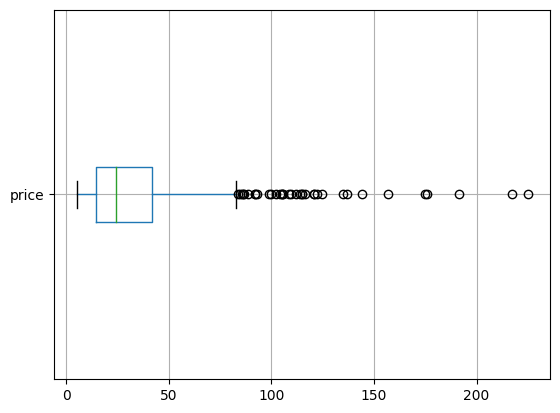

In [ ]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
data.boxplot(column="price", vert=False)
plt.show()

In [ ]:
#Autre méthode avec plotly express
import plotly.express as px
fig = px.box(data, y="price")
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [ ]:
#Calculer la moyenne du prix
prix_moyen = data['price'].mean()
#Calculer l'écart-type du prix
std_prix = data['price'].std()
print(prix_moyen, std_prix)
#Calculer le Z-score
from scipy import stats
data['z_score'] = stats.zscore(data.price)
data
#z score global = 1.29 selon correction ??

32.27763636363637 26.60319597859203


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,product_type,post_name,z_score
0,3847,1,24.2,16,instock,12.88,15298,6.0,Vin,pierre-jean-villa-saint-joseph-preface-2018,-0.303818
1,3849,1,34.3,10,instock,17.54,15296,9.0,Vin,pierre-jean-villa-saint-joseph-tilde-2017,0.076066
2,3850,1,20.8,0,outofstock,10.64,15300,0.0,Vin,pierre-jean-villa-croze-hermitage-accroche-coe...,-0.431700
3,4032,1,14.1,26,instock,6.92,19814,12.0,Vin,pierre-jean-villa-igp-gamine-2018,-0.683702
4,4039,1,46.0,3,instock,23.77,19815,3.0,Vin,pierre-jean-villa-cote-rotie-carmina-2017,0.516129
...,...,...,...,...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,NaN,NaN,NaN,NaN,0.478517
821,7204,0,45.0,9,instock,24.18,NaN,NaN,NaN,NaN,0.478517
822,7247,1,54.8,6,instock,27.18,13127-1,4.0,Vin,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.847117
823,7329,0,26.5,14,instock,13.42,14680-1,NaN,NaN,NaN,-0.217310


In [ ]:
#Quel est le seuil prix dont z-score est supérieur à 3?
data.loc[data['z_score'] > 3,:].sort_values('z_score', ascending=True)
#premier prix au-delà de 3 écarts-types = 114 (environ)
data.loc[data['z_score'] > 3,:].count()

product_id        17
onsale_web        17
price             17
stock_quantity    17
stock_status      17
purchase_price    17
id_web            16
total_sales       16
product_type      16
post_name         16
z_score           17
dtype: int64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [ ]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
data.describe()

,product_id,onsale_web,price,stock_quantity,purchase_price,total_sales,z_score
count,825.000000,825.000000,825.000000,825.000000,825.000000,713.000000,8.250000e+02
mean,5162.597576,0.864242,32.277636,21.602424,16.940582,8.056101,-1.894781e-16
std,902.644635,0.342739,26.603196,21.917863,14.561840,4.164078,1.000607e+00
min,3847.000000,0.000000,5.200000,0.000000,2.740000,0.000000,-1.018451e+00
25%,4348.000000,1.000000,14.500000,7.000000,7.590000,5.000000,-6.686573e-01
50%,4907.000000,1.000000,24.300000,18.000000,12.710000,8.000000,-3.000570e-01
75%,5805.000000,1.000000,42.000000,30.000000,22.020000,11.000000,3.656802e-01
max,7338.000000,1.000000,225.000000,145.000000,137.810000,36.000000,7.248726e+00


In [ ]:
#Définissez un seuil pour les articles "outliers" en prix
#formule pour trouver outliers = Q3 + (1.5 * IQR) et Q1 – (1.5 * IQR)
upper_outlier = 42 + (1.5 * (42 - 14.50))
lower_outlier = 14.50 - (1.5 * (42 - 14.50))
#seuil à 83,25 euros

In [ ]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
data.loc[data['price'] > upper_outlier,:].count()

product_id        36
onsale_web        36
price             36
stock_quantity    36
stock_status      36
purchase_price    36
id_web            32
total_sales       32
product_type      32
post_name         32
z_score           36
dtype: int64

In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
#on peut avoir de l'alcool haut de gamme, donc ça me semble justifié

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [ ]:
##############################
# Calculer le CA du site web #
##############################

#création df avec uniquement produits vendus
ventes = data.loc[data['onsale_web'] == 1,:].reset_index(drop=True)
#Créez une colonne calculant le CA par article
ventes['CA_article'] = ventes['price'] * ventes['total_sales']
#Calculez la somme de la colonne "ca_par_article"
CA_total = ventes['CA_article'].sum()
#Ce résultat correspond au chiffre d'affaire du site web
CA_total

143505.09999999998

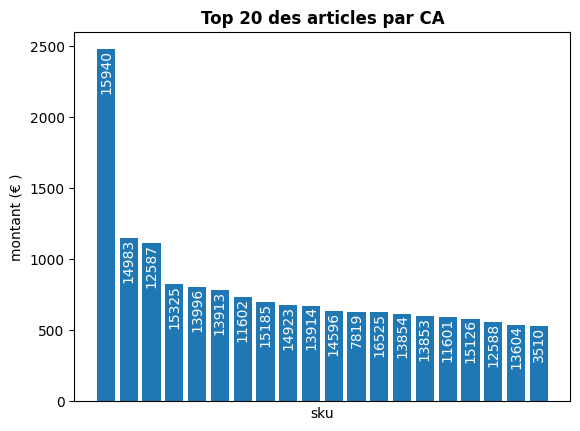

In [ ]:
###############################
# Palmares des articles en CA #
###############################
ventes = ventes.astype({'product_id':'str'})
#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
ventes.loc[:,:].sort_values('CA_article', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
ventes = ventes.loc[:,:].sort_values('CA_article', ascending=False).reset_index(drop=True)
#Afficher les 20 premier articles en CA
top_20_CA = ventes.sort_values('CA_article', ascending=False).iloc[:20,:].reset_index(drop=True)
#Graphique en barre des 20 premiers articles avec plotly express
plt.bar(height=top_20_CA['CA_article'], x=top_20_CA['id_web'])
plt.title('Top 20 des articles par CA', fontweight='bold')
plt.xlabel('sku')
plt.xticks([])
plt.ylabel('montant (€ )')
for index, value in enumerate(top_20_CA['CA_article']):
    plt.text(index, value, str(top_20_CA['id_web'][index]), ha='center', va='top', rotation='vertical', color='white')

2.4 % des produits génèrent 10 % du chiffre d'affaires total.
6.9 % des produits génèrent 20 % du chiffre d'affaires total.
12.8 % des produits génèrent 30 % du chiffre d'affaires total.
19.8 % des produits génèrent 40 % du chiffre d'affaires total.
27.9 % des produits génèrent 50 % du chiffre d'affaires total.
37.4 % des produits génèrent 60 % du chiffre d'affaires total.
48.2 % des produits génèrent 70 % du chiffre d'affaires total.
60.8 % des produits génèrent 80 % du chiffre d'affaires total.


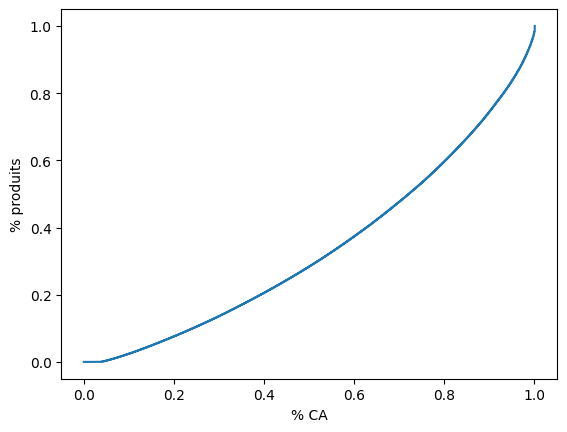

In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
ventes['CA_PCT'] = ventes['CA_article'] / CA_total
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
ventes['F_cum_CA'] = ventes['CA_PCT'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
NB_articles = len(ventes)
for i in range (1, 9, 1):
    PCT = ventes.loc[ventes['F_cum_CA'] < i/10,:].reset_index(drop=True)
    NB_articles_PCT = len(PCT)
    proportion = NB_articles_PCT / NB_articles
    print('{} % des produits génèrent {} % du chiffre d\'affaires total.'.format(round(proportion * 100, 1), i*10))
#Courbe de Pareto
CA = ventes['CA_article']
dep = CA.values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.ylabel('% produits')
plt.xlabel('% CA')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

(10.0, 37.0)

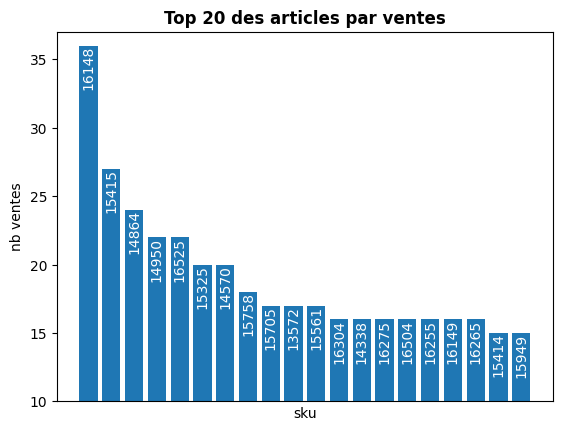

In [ ]:
#####################################
# Palmares des articles en quantité #
#####################################
ventes_total = ventes['total_sales'].sum()
#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
ventes.loc[:,:].sort_values('total_sales', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
ventes = ventes.loc[:,:].sort_values('total_sales', ascending=False).reset_index(drop=True)
#Afficher les 20 premier articles en quantité
top_20_sales = ventes.sort_values('total_sales', ascending=False).iloc[:20,:].reset_index(drop=True)
#Graphique en barre des 20 premiers articles avec plotly express
plt.bar(height=top_20_sales['total_sales'], x=top_20_sales['id_web'])
plt.title('Top 20 des articles par ventes', fontweight='bold')
plt.xlabel('sku')
plt.xticks([])
plt.ylabel('nb ventes')
for index, value in enumerate(top_20_sales['total_sales']):
    plt.text(index, value, str(top_20_sales['id_web'][index]), ha='center', va='top', rotation='vertical', color='white')
plt.ylim([10, 37])

In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
ventes['sales_PCT'] = ventes['total_sales'] / ventes_total
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
ventes['F_cum_sales'] = ventes['sales_PCT'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
NB_articles = len(ventes)
for i in range (1, 9, 1):
    PCT = ventes.loc[ventes['F_cum_sales'] <= i/10,:].reset_index(drop=True)
    NB_articles_PCT = len(PCT)
    proportion = NB_articles_PCT / NB_articles
    print('{} % des produits génèrent {} % des ventes totales (quantités unitaires).'.format(round(proportion * 100, 1), i*10))
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web


4.5 % des produits génèrent 10 % des ventes totales (quantités unitaires).
10.5 % des produits génèrent 20 % des ventes totales (quantités unitaires).
17.0 % des produits génèrent 30 % des ventes totales (quantités unitaires).
24.2 % des produits génèrent 40 % des ventes totales (quantités unitaires).
31.9 % des produits génèrent 50 % des ventes totales (quantités unitaires).
40.4 % des produits génèrent 60 % des ventes totales (quantités unitaires).
49.7 % des produits génèrent 70 % des ventes totales (quantités unitaires).
60.7 % des produits génèrent 80 % des ventes totales (quantités unitaires).


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

<ipython-input-103-273fca65f501>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(10.0, 35.0)

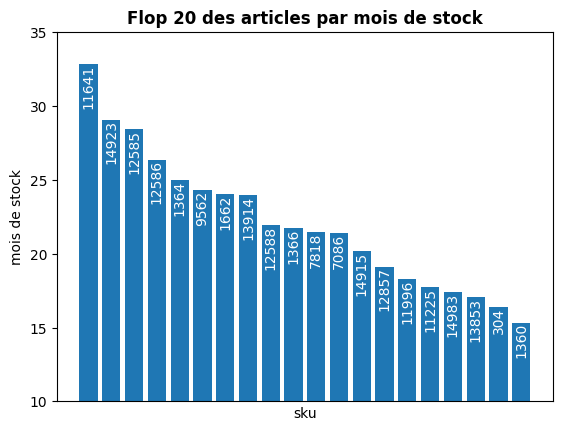

In [ ]:
######################################
# Calculez le nombre de mois de stock #
######################################

#Import de numpy (déjà fait)
#Création de la colonne Rotation de stock ((Valeur stock moyen / Valeur des ventes) * période)
# source : https://abcsupplychain.com/fr/rotation-de-stock/
data['rotation_stock'] = ((data['total_sales']+data['stock_quantity']+data['stock_quantity'])/2) / (data['total_sales']) * 31
#Remplacement des "inf" par 0
data['rotation_stock'].fillna(0, inplace=True)
for i in data.index:
    if str(data['rotation_stock'][i]) == 'inf':
          data['rotation_stock'][i] = 0
#transformer les jours en mois
data['rotation_stock'] = data['rotation_stock'] / 30
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
data = data.loc[:,:].sort_values('rotation_stock', ascending=False).reset_index(drop=True)
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
flop_20_stock = data.sort_values('rotation_stock', ascending=False).iloc[:20,:].reset_index(drop=True)
plt.bar(height=flop_20_stock['rotation_stock'], x=flop_20_stock['id_web'])
plt.title('Flop 20 des articles par mois de stock', fontweight='bold')
plt.xlabel('sku')
plt.xticks([])
plt.ylabel('mois de stock')
for index, value in enumerate(flop_20_stock['rotation_stock']):
    plt.text(index, value, str(flop_20_stock['id_web'][index]), ha='center', va='top', rotation='vertical', color='white')
plt.ylim([10, 35])

In [ ]:
####################################
# Valorisation des stocks en euros #
####################################

#question travaille-t-on sur df_merge ou data ici ?

#Création de la colonne Valorisation des stocks en euros
data['valorisation'] = data['purchase_price'] * data['stock_quantity']
#Calculer la somme de la colonne "Valorisation_stock_euros"
data['valorisation'].sum()

298627.66

In [ ]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
data['stock_quantity'].sum()

17822

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [ ]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT (taux TVA alcools = 20 %)
data['price_HT'] = data['price'] / 1.20
#Création de la colonne Taux de marge ((prix HT - purchase price) / price HT)
data['tx_marge'] = (data['price_HT'] - data['purchase_price']) / data['price_HT']
#Afficher le prix minimum de la colonne "taux_marge"
print("Le taux de marge minimum est: {}.".format(min(data['tx_marge'])))
#Afficher le prix maximum de la colonne "taux_marge"
print("Le taux de marge maximum est: {}.".format(max(data['tx_marge'])))

Le taux de marge minimum est: -6.3498814229249.
Le taux de marge maximum est: 0.477568.


In [ ]:
#affichage de la ligne avec un taux de marge inférieur à 0
data.loc[data['tx_marge'] < 0,:]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,product_type,post_name,z_score,CA_article,CA_PCT,F_cum_CA,rotation_stock,valorisation,price_HT,purchase_price_HT,tx_marge
717,6324,0,92.00,18,instock,99.00,NaN,NaN,NaN,NaN,2.246294,NaN,NaN,NaN,0.0,1782.00,76.666667,82.500000,-0.291304
732,7196,0,31.00,55,instock,31.20,NaN,NaN,NaN,NaN,-0.048055,NaN,NaN,NaN,0.0,1716.00,25.833333,26.000000,-0.207742
785,4355,1,12.65,97,instock,77.48,12589,0.0,Champagne,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,-0.738240,0.0,0.0,1.0,0.0,7515.56,10.541667,64.566667,-6.349881
807,4864,0,8.30,0,outofstock,9.99,15154,NaN,NaN,NaN,-0.901853,NaN,NaN,NaN,0.0,0.00,6.916667,8.325000,-0.444337


In [ ]:
#création d'un dataframe avec les taux positifs
data = data.loc[data['tx_marge'] > 0,:]
#Afficher le prix minimum de la colonne "taux_marge"
print("Le taux de marge minimum est: {}.".format(min(data['tx_marge'])))
#Afficher le prix maximum de la colonne "taux_marge"
print("Le taux de marge maximum est: {}.".format(max(data['tx_marge'])))

Le taux de marge minimum est: 0.22778625954198473.
Le taux de marge maximum est: 0.477568.


(0.15, 0.46)

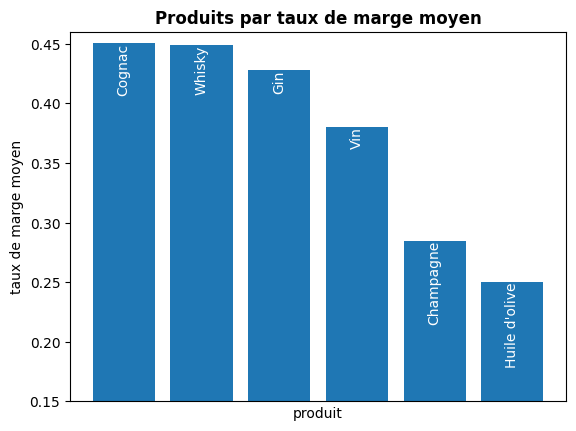

In [ ]:
#création d'un dataframe avec le taux de marge moyen par type de produit
data_tx_marge_moyen = data.groupby('product_type')['tx_marge'].mean().sort_values(ascending=False)
data_tx_marge_moyen = data_tx_marge_moyen.reset_index()
#Affichage dans un graphique du taux de marge par type de produit
plt.bar(height=data_tx_marge_moyen['tx_marge'], x=data_tx_marge_moyen['product_type'])
plt.title('Produits par taux de marge moyen', fontweight='bold')
plt.xlabel('produit')
plt.xticks([])
plt.ylabel('taux de marge moyen')
for index, value in enumerate(data_tx_marge_moyen['tx_marge']):
    plt.text(index, value, str(data_tx_marge_moyen['product_type'][index]), ha='center', va='top', rotation='vertical', color='white')
plt.ylim([0.15, 0.46])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

<Axes: >

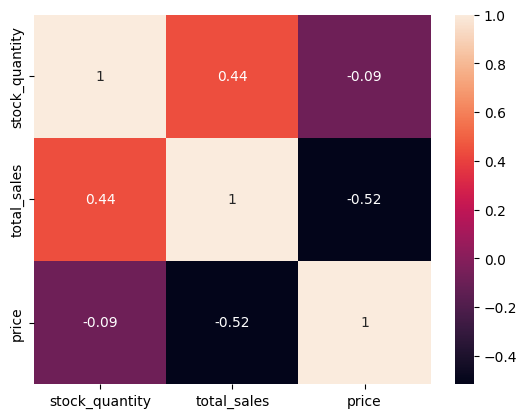

In [ ]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns
#Création d'un heatmap de correlation avec les variables stock, sales et price
#on peut également créer un mask pour n'afficher qu'une demi heatmap
cols = ['stock_quantity', 'total_sales', 'price']
heatmap = data[cols]
sns.heatmap(heatmap.corr(), annot=True)

In [ ]:
#Que peut-on conclure des correlations ?
#corrélation négative entre ventes et prix (plus le prix est élevé moins les ventes sont élevées)
#corrélation presque neutre entre stock et prix
#corrélation moyenne entre ventes et stock (vraiment utile ?)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [ ]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes
data.to_excel('analyse_ventes_octobre.xlsx', index=False)